<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/Classification-CardioVascular-Risk-Pridiction/blob/main/PERSONAL_NOTEBOOK_%7C_CP_3_%7C_CARDIOVASCULAR_RISK_PREDICTION_%7C_SAMARJEET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPSTONE 3 CLASSIFICATION - CARDIOVASCULAR RISK PREDICTION**
we have been provided with a study dataset of residents of a tow, and we have to predict from there medical conditions and habits, if there is any risk of Cardiovascular disease or problems.


# **PROBLEM STATEMENT**




*   The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.
*   The dataset provides the patients’ information. It includes over 3390 records and 17 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factor
*   The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).









# **UNDERSTANDING THE PROBLEM IN BUSINESS CONTEXT**



# <b>DATA UNDERSTANDING</b>



Our Data set has 3390 obervasations and , 17 columns/features.

### <b>Demographic:</b>

id	age	education	sex	is_smoking	cigsPerDay	BPMeds	prevalentStroke	prevalentHyp	diabetes	totChol	sysBP	diaBP	BMI	heartRate	glucose	TenYearCHD

*   **id**: Unique id of the person
*   **Sex**: male or female("M" or "F")
*   **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
*   **education**: Education qualification of the person

### <b>Behavioral:</b>
  
*   **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
  
*   **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### <b>Medical( history):</b>

*   **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
   
*   **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
  
*   **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
  
*   **diabetes**: whether or not the patient had diabetes (Nominal) 

### <b>Medical(current):</b>

*   **totChol**: total cholesterol level (Continuous)
   
*   **sysBP**: systolic blood pressure (Continuous)
   
*   **diaBP**: diastolic blood pressure (Continuous)
   
*   **BMI**: Body Mass Index (Continuous)
   
*   **heartRate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
   
*   **Glucose**: glucose level (Continuous)

### <b>Predict variable (desired target):</b>

*   **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **DATASET LOADING AND OVERVIEW**

## Importing Libraries and Modules.

In [1]:
import pandas as pd

import numpy as np
from numpy import math

import random

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

!pip install matplotlib --upgrade

import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer, StandardScaler, PolynomialFeatures, LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV

from sklearn import metrics

from sklearn.metrics import r2_score, log_loss, mean_squared_error, accuracy_score, mean_absolute_error,  roc_auc_score, classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

from sklearn.pipeline import make_pipeline

from scipy.stats import skew

from imblearn.under_sampling import RandomUnderSampler

from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

import xgboost as xgb

from sklearn import tree, ensemble

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


pd.options.mode.chained_assignment = None  # default='warn'

from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print('matplotlib: {}'.format(matplotlib.__version__))


matplotlib: 3.2.2


## Dataset Loading

In [2]:
# Adding Data set throught link.
url = "https://drive.google.com/file/d/1jv8AyntOWWJDWyEv1TtsCYLXAmCYZf9N/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Naming our dataset
df =  pd.read_csv(url,  encoding= 'unicode_escape')


In [3]:
# Creating a copy, for working on it without harming the orignal dataset.
cvd_df = df.copy()


## Data Overview

In [4]:
# checking top 5 Rows or instances.
cvd_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# checking last 5 Rows or instances.
cvd_df.tail()      

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# checking total rows and columns ( Rows, Columns).
cvd_df.shape

(3390, 17)

Some insights:-
1.  We have 8760 instances and 14 features.

In [7]:
# checking basic information of all columns such as datatype, total number null values present, memory usage etc.
cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

Some insights:-
1. We do not have any null values present in any column
2. We have 4 columns which have object data type. others are either float64 or int64.

In [8]:
# checking description of all data types columns.
cvd_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [9]:
# Checking for unique values in each column
cvd_df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [10]:
# columns in our dataset
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **DATASET CLEANUP**

## Duplicate check

In [11]:
# Checking for duplicate values
len(cvd_df[cvd_df.duplicated()])

0

## Null or missing values

### *Checking for null values*

In [12]:
# Checking for null or missing values in every column
cvd_df.isnull().sum()


id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

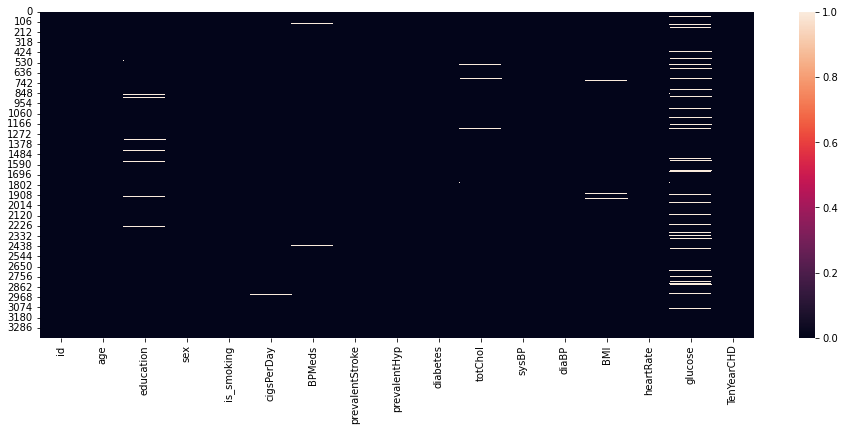

In [13]:
# PLotting missing and null values in a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(cvd_df.isnull())

Some insights:-
1. Null values are present in these rows:
*   education
*   cigsPerDay
*   BPMeds
*   totChol
*   BMI
*   heartRate
*   glucose



In [14]:
# Checking number of rows in which null values are present
count = 0
for i in cvd_df.isna().sum(axis = 1) :
  if i>0 :
    count = count + 1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  463


Explaination:-
* So, removing all null values will result in loss of almost 463 observations and we wil be left with almost 2927 columns.

In [15]:
# Percentage of null values in the respective columns
(cvd_df.isnull().sum()/cvd_df.shape[0]*100).sort_values(ascending=False)

glucose            8.967552
education          2.566372
BPMeds             1.297935
totChol            1.120944
cigsPerDay         0.648968
BMI                0.412979
heartRate          0.029499
id                 0.000000
diaBP              0.000000
sysBP              0.000000
prevalentHyp       0.000000
diabetes           0.000000
age                0.000000
prevalentStroke    0.000000
is_smoking         0.000000
sex                0.000000
TenYearCHD         0.000000
dtype: float64

### *Dealing will null values*

Explaination:-
* As the data is missing and replacing it with mean, median or mode will make the dataset biased, and in case of medical data we cant take risk, so to avoid any such biasness in model learning we will delete those observations.We also havent got any prior request from the business regarding the handling of null values.

* We cant take risk as replacing such value may affect the number of false positives and false negatives.


In [16]:
cvd_df.shape

(3390, 17)

In [17]:
# Deleting null values observations
cvd_df.dropna(how = "any", inplace= True)

# Resetting index
cvd_df.reset_index(inplace = True, drop = True)

# Shape of the dataset now
cvd_df.shape



(2927, 17)

In [18]:
# Re-Check for null values in the new dataset
cvd_df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Dropping unnecessary features

In [19]:
#Dropping 'id' feature
cvd_df.drop("id",axis=1,inplace=True) 

# #Dropping 'education' feature
# cvd_df.drop("education",axis=1,inplace=True) 


Explaination:-
*  Since ID has no effect on target variable so we will drop this column from our dataset.

* As there is no explaination of the column education from the business. we will first see, it it is higly correlated to our deoendent variable we might keep it.


## Dividing into categorical and numerical features.

In [20]:
categorical_features= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

numerical_features= ['age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

independent_variables= ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'age', 'cigsPerDay',  'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

dependent_variables=['TenYearCHD']

In [33]:
for i in independent_variables:
  print(i )

education
sex
is_smoking
BPMeds
prevalentStroke
prevalentHyp
diabetes
age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose


# **EDA**

In [21]:
cvd_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
1,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
2,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
3,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
4,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


## **UNIVARIATE ANALYSIS**

### 1. Histogram for all columns

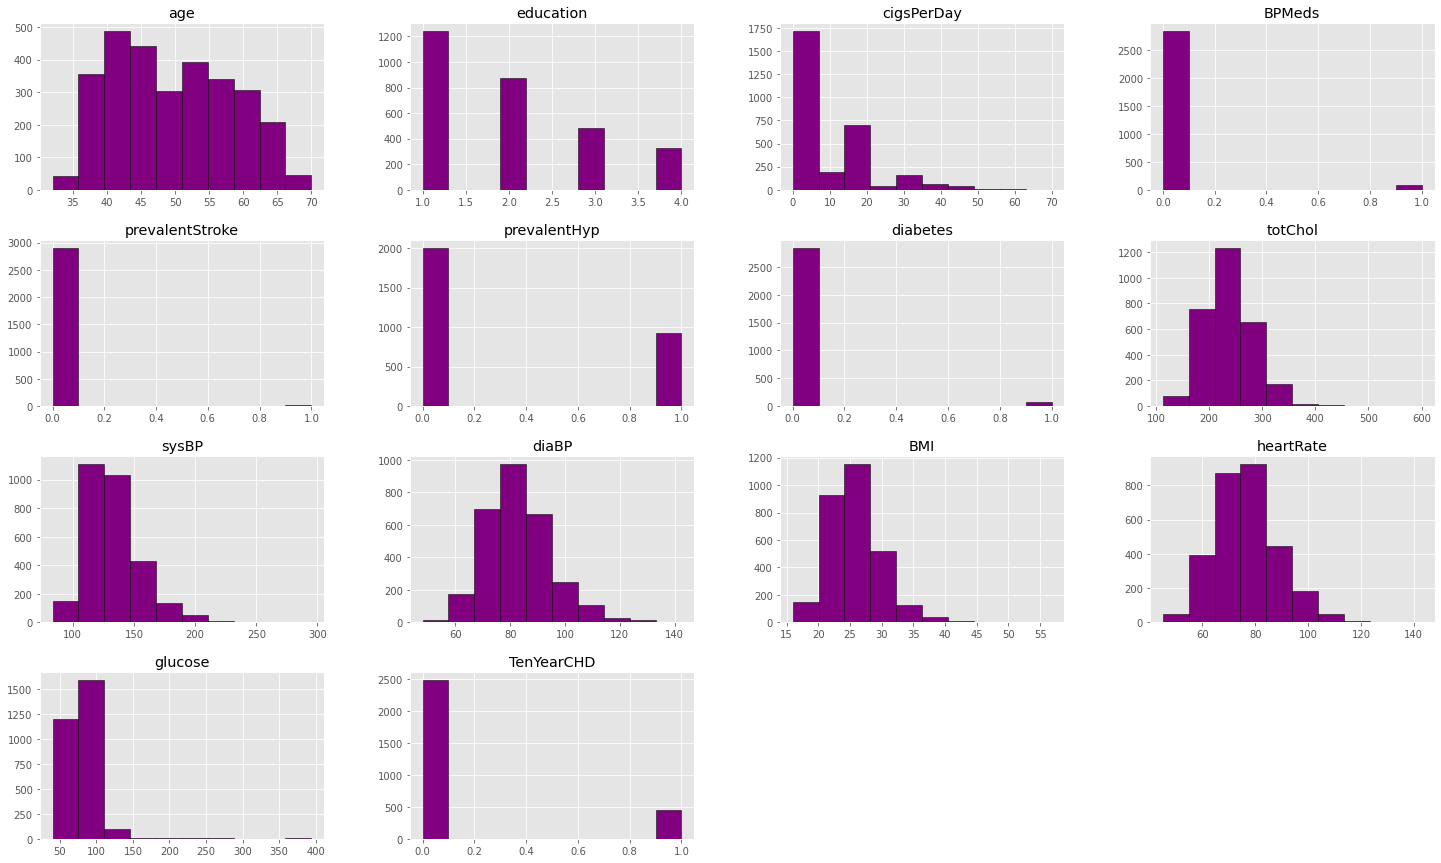

In [22]:
# it shows the value distribution in each columns
plt.style.use('ggplot')
colors=['green', 'blue', 'purple','red', 'orange', 'maroon', 'yellow', ]
clr= random.choice(colors)

cvd_df.hist(figsize=(25,15),color = clr, ec="black")
plt.show()

### 2. Correlation heatmap

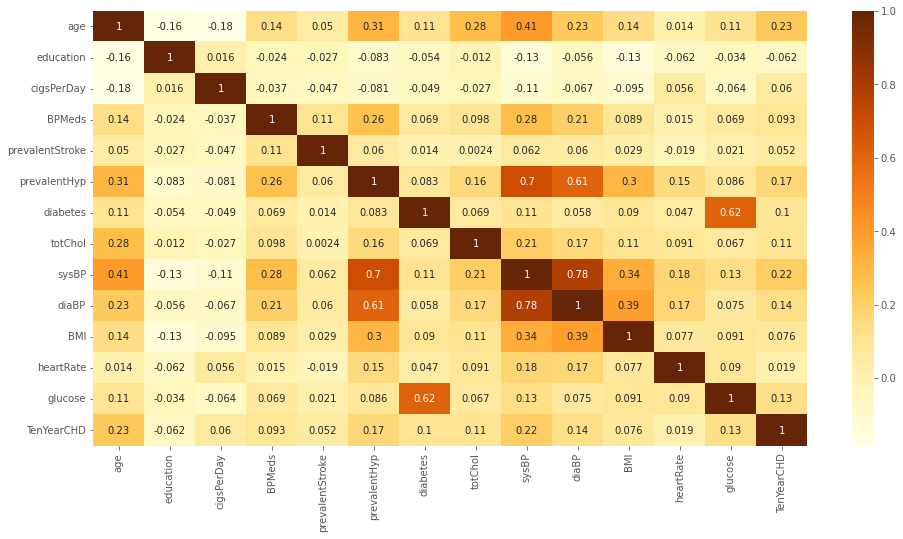

In [23]:
# Printing correlation heatmap
plt.figure(figsize = (16,8))
sns.heatmap(cvd_df.corr(),annot=True,cmap="YlOrBr")
plt.show()

Explaination:-
1. diabetes and glucose are higly correlated, as we know in diabetes the sugar/glucose in blood gets high as body do not produce insulin to break it and use as a energy source and so the sugar level rises in a person.
2. sysBP and diaBP are highly correlated to each other and prevalentHyp(hypertensive-high blodpressure problem) and BPmeds as hypertensive problem requires medications.
3. TenYearCHD is positively correlated to age, hprevalenthyp(hypertensive), totChol(cholestrol) and diabetes. so if a person has all these diseases and issues, he/she might be vulnurable of getting CHD.
4. BMI (body mass index) is also positively correlated to prevalentHyp. so as BMI increases prevalentHyp increases.
5. Education and cigsperday are negatively correlated to age, we can say people with high age, consume less cegrates per day and may have less education qualification.


We can say that ***TenYearCHD*** is positively correlated to these top 7 
features in Decending order.
1. Age....................................- (0.23)
3. sysBP.................................- (0.22)
3. prevalentHyp....................- (0.17)
4. diaBP.................................- (0.14)
5. glucose.............................- (0.13)
6. totchol...............................- (0.11)
7. diabetes.............................- (0.10)




### 3. Age distribution

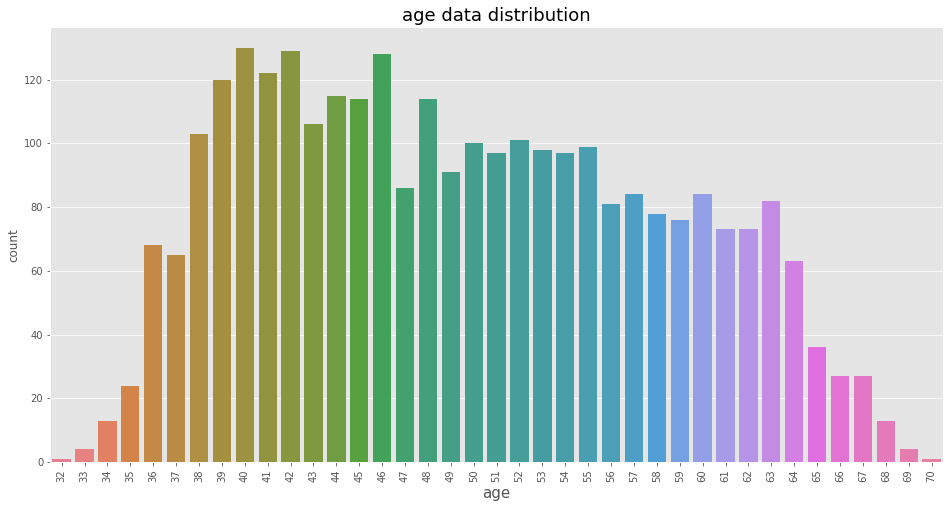

In [24]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'age', data=cvd_df , palette='husl')
ax.set_xlabel( 'age' , size = 15 )
ax.set_title( 'age data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have most of the data of age between 38 to 46 years old people.
* Minimum data is available of age 32 to 34 and from 68 to 70. 

### 4. Distribution of Sex

Text(0.5, 1.0, 'Distribution of Sex(Gender)')

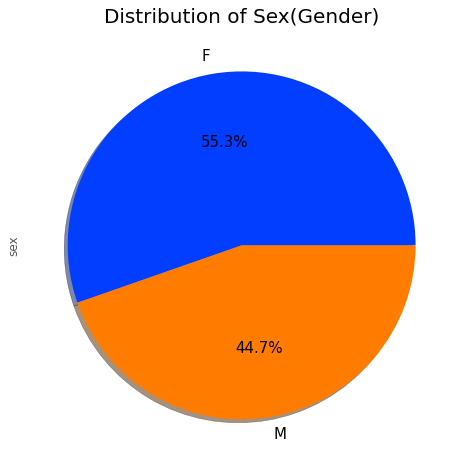

In [25]:
# Distribution of sex
plt.figure(figsize=(16,8))
palette_color = sns.color_palette('bright')
cvd_df['sex'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of Sex(Gender)', fontsize=20)

Explaination:-
* We have more data of females as compared to males.

### 5. Distribution of is_Smoking

Text(0.5, 1.0, 'is_smoking data distribution')

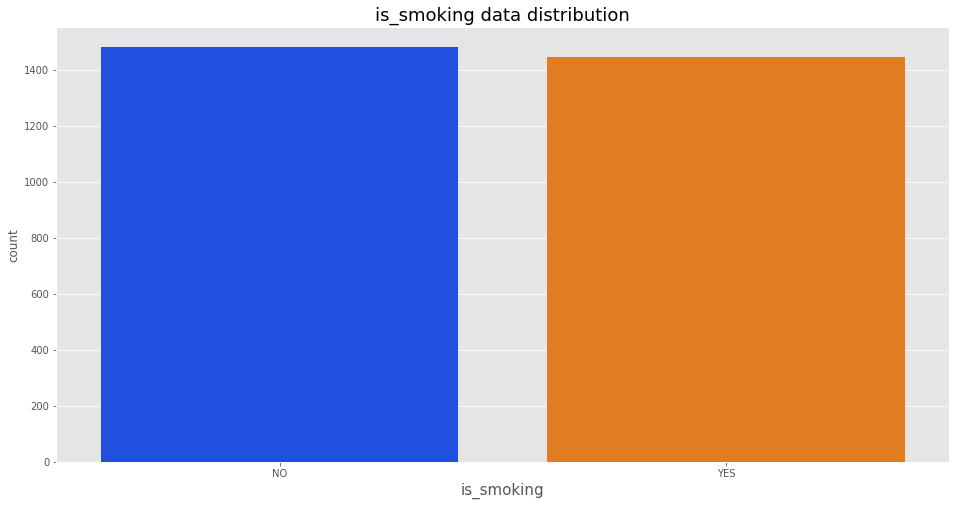

In [26]:
# Distribution of age
fig, ax = plt.subplots(figsize = (16,8))
sns.countplot(x= 'is_smoking', data=cvd_df , palette='bright')
ax.set_xlabel( 'is_smoking' , size = 15 )
ax.set_title( 'is_smoking data distribution' , size = 18 )

Explaination:-
* We have less smokes in out provided dataset.


### 7. Distribution of TenYearCHD

Text(0.5, 1.0, 'Distribution of TenYearCHD')

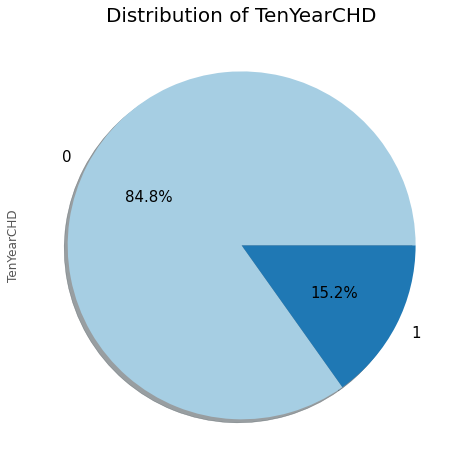

In [27]:
# Distribution of TenYearCHD
plt.figure(figsize=(16,8))
palette_color = sns.color_palette('Paired')
cvd_df['TenYearCHD'].value_counts().plot(kind='pie',colors=palette_color , autopct='%1.1f%%' , fontsize=15 , shadow=True)
plt.title('Distribution of TenYearCHD', fontsize=20)

Explaination:-
* In our dataset the dependent variable, the onewe are going to predict is 15.2% of the total observations.

### 8. Distribution of Diabetes

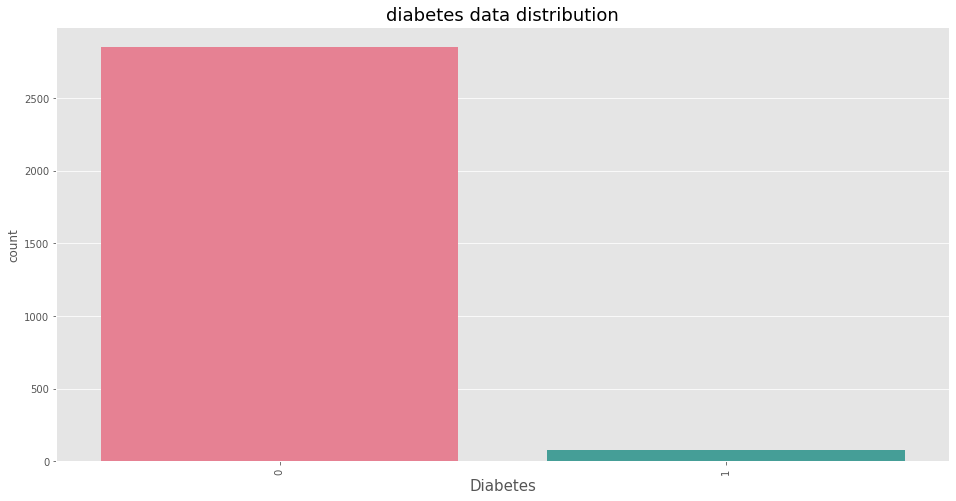

In [28]:
# Distribution of age
plt.figure(figsize = (16,8))
sns.countplot(x= 'diabetes', data=cvd_df , palette='husl')
plt.xlabel( 'Diabetes' , size = 15 )
plt.title( 'diabetes data distribution' , size = 18 )
plt.xticks(rotation=90);

Explaination:-
* We have very less diabetic patients in the dataset as compared to non-diabetic paitents.

### 9. Education data distribution

Text(0.5, 1.0, 'education data distribution')

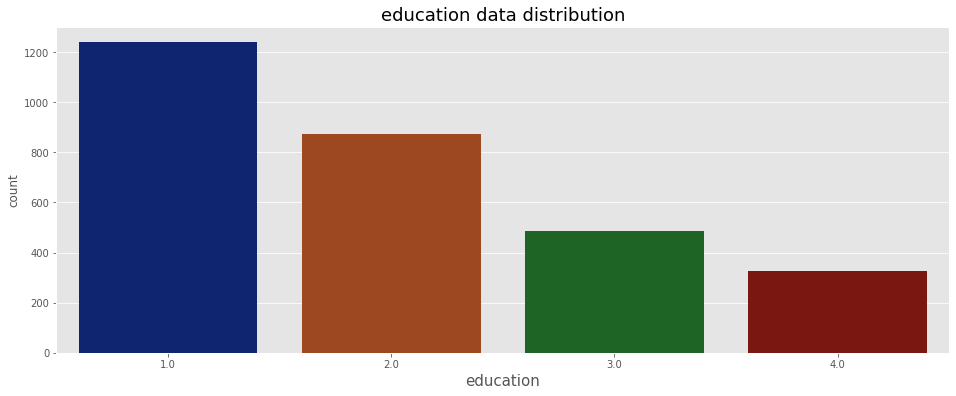

In [29]:
fig, ax = plt.subplots(figsize = (16,6))
sns.countplot(x= 'education' , data=cvd_df , palette='dark')
ax.set_xlabel( 'education' , size = 15 )
ax.set_title( 'education data distribution' , size = 18 )

Explaination:-
* there are more level 1 education people in the record and as the education level increases till 4th level, the number of peope possessing  it are getting leniarly lesser.

## something

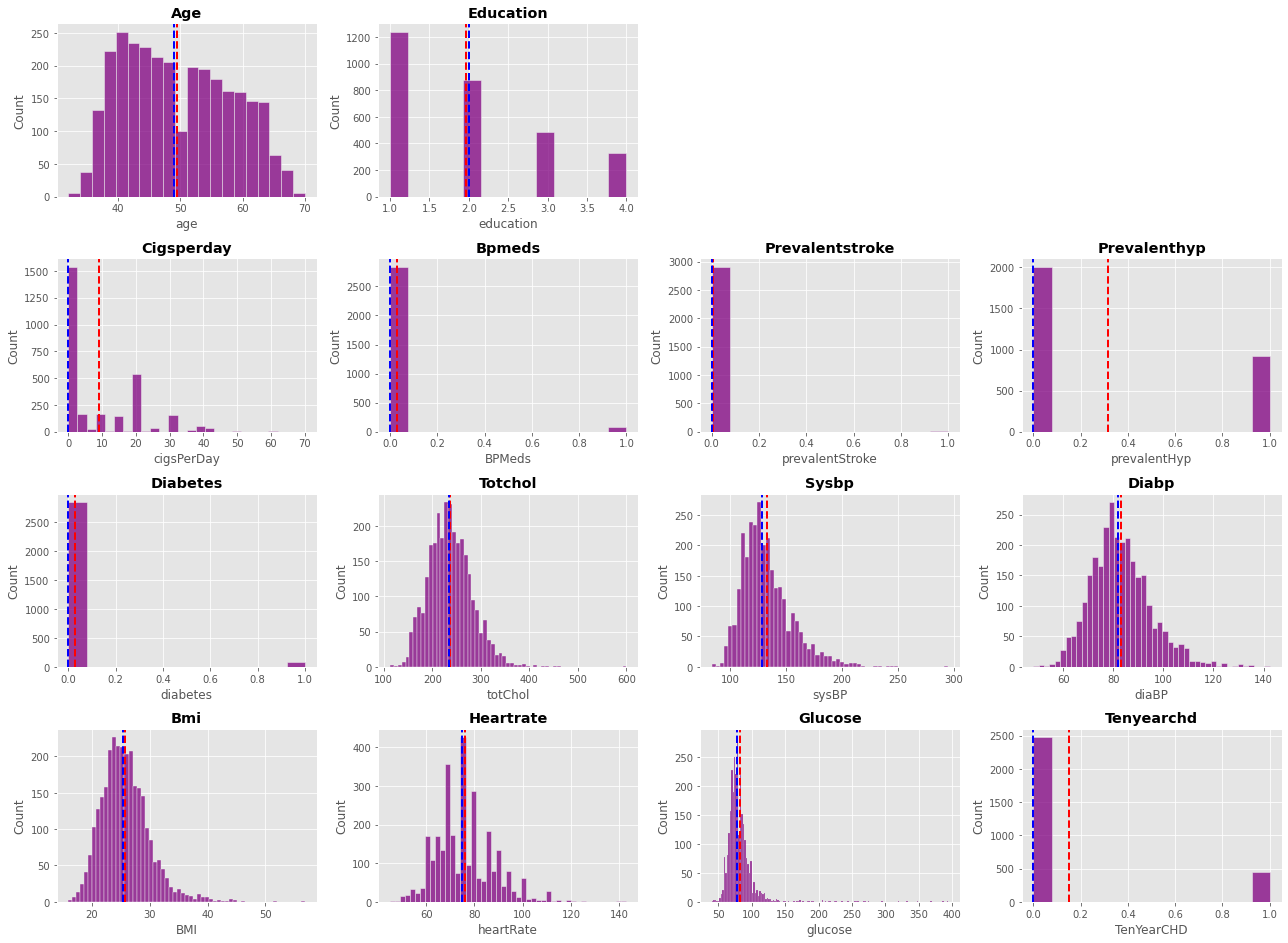

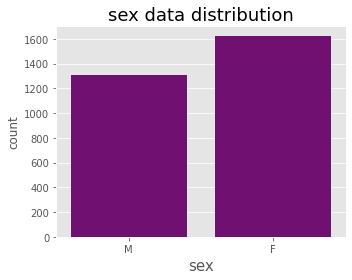

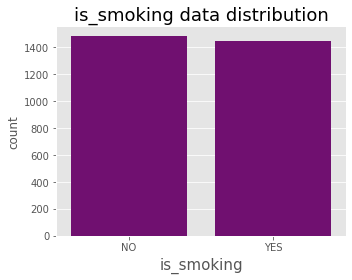

In [30]:
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(cvd_df.columns):
  if cvd_df[column].dtype != object:
    feature = cvd_df[column]
    ax=plt.subplot(5, 4, i+1)
    sns.histplot(feature , color='purple')
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
    plt.title(f'{column.title()}',weight='bold')
    plt.tight_layout()

for i, column in enumerate(cvd_df.columns):
  if cvd_df[column].dtype == object:
    fig, ax = plt.subplots(figsize = (5,4))
    sns.countplot(x= column, data=cvd_df , color= 'purple')
    ax.set_xlabel( f'{column}' , size = 15 )
    ax.set_title( f'{column} data distribution' , size = 18 )
    plt.tight_layout()

### Sex data distribution

Text(0.5, 1.0, 'sex data distribution')

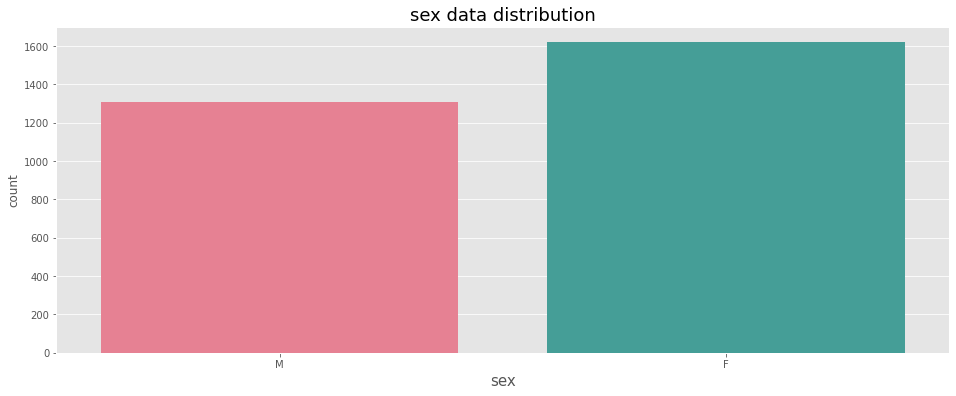

In [31]:
fig, ax = plt.subplots(figsize = (16,6))
sns.countplot(x= 'sex', data=cvd_df , palette='husl')
ax.set_xlabel( 'sex' , size = 15 )
ax.set_title( 'sex data distribution' , size = 18 )

## **Bivariate analysis**

### 1. TenYearCHD vs education, sex, is_smoking, BPMeds, prevalentStroke, prevalentHyp, diabetes, age, cigsPerDay, heartRate 


AttributeError: ignored

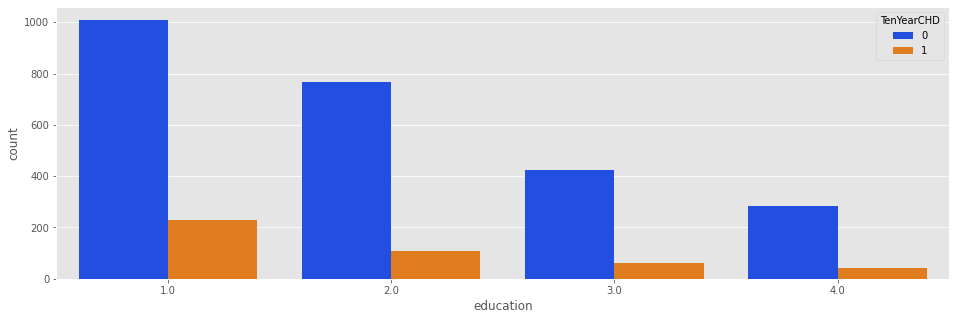

In [32]:
list_col=[]

for column in independent_variables:


  # if cvd_df[column].dtype != object:

  if cvd_df[f'{column}'].nunique()<70:

    plt.figure(figsize=(16,5))
    ax = sns.countplot( x= f'{column}' , hue='TenYearCHD' ,data= cvd_df,  palette='bright' )
    for i in ax.containers:
      ax.bar_label(i,)
    plt.title(f'The effect of column "{column.upper()}" on the target column TenYearCHD ',size=20)
    plt.legend(['No Risk','At Risk'])
    plt.show()
    list_col.append(column)


for i in list_col:
  print(i)

In [ ]:
ax = sns.countplot(x='sex' ,hue='TenYearCHD', data=cvd_df)
 
# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)

## Multivariate analysis

# **FEATURE ENGINEERING**

# **TARGET FEATURE CONDITIONING**

# **IMBALANCE HANDLING**

# **MODEL IMPLEMENTATION**

# **EVALUATION**

# **MODEL EXPLAINABILITY**

# **CONCLUSION**